<a href="https://colab.research.google.com/github/Anuj-23/brainTumorPredictor/blob/main/ViT_CNN_Hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Train: 3882, Val: 685, Test: 1154


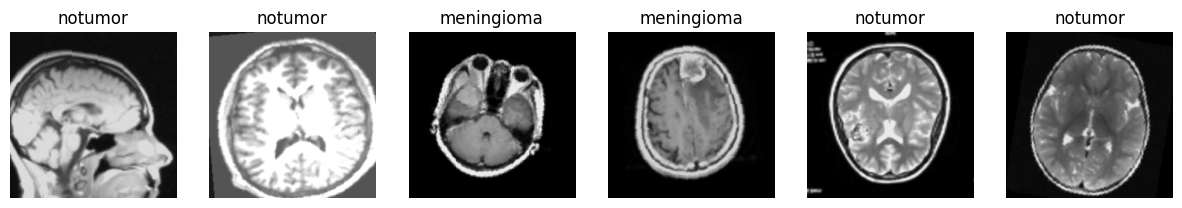

In [2]:
import zipfile
import os
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt



# === Step 2: Point to extracted folders directly ===
train_dir = "/drive/MyDrive/dataset_split/train"
test_dir = "/drive/MyDrive/dataset_split/test"

# === Step 3: Transformations ===
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# === Step 4: Load datasets ===
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transform)

# === Step 5: Validation Split ===
val_ratio = 0.15
val_size = int(len(train_dataset) * val_ratio)
train_size = len(train_dataset) - val_size

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# === Step 6: Data Loaders ===
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# === Step 7: Class Names & Sizes ===
class_names = train_dataset.dataset.classes
print("Classes:", class_names)
print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")

# === Step 8: Visualize Sample Batch ===
def show_batch(dataloader):
    images, labels = next(iter(dataloader))
    fig, ax = plt.subplots(1, 6, figsize=(15, 5))
    for i in range(6):
        img = images[i].permute(1, 2, 0).numpy()
        img = (img * 0.5 + 0.5).clip(0, 1)
        ax[i].imshow(img)
        ax[i].set_title(class_names[labels[i]])
        ax[i].axis('off')
    plt.show()

# Show sample batch
show_batch(train_loader)


🧪 Sample Batch Image Shape: torch.Size([32, 3, 224, 224])
🧪 Sample Batch Label Shape: torch.Size([32])
🧮 Batch Mean: -0.1864
🧮 Batch Std: 0.6192

🧾 Class to Index Mapping:
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

📊 Training Class Distribution:
  glioma: 1056 samples
  meningioma: 1070 samples
  notumor: 1276 samples
  pituitary: 1165 samples


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


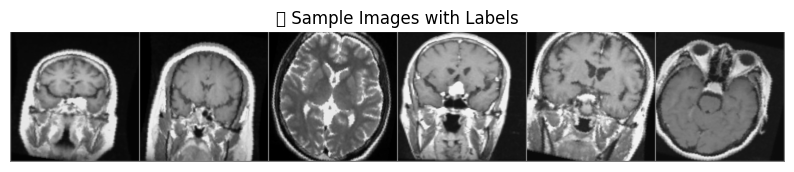

🧾 Sample Labels:
meningioma | pituitary | notumor | meningioma | pituitary | pituitary


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import torchvision

# === 1. Batch Shape Check ===
sample_images, sample_labels = next(iter(train_loader))
print(f"🧪 Sample Batch Image Shape: {sample_images.shape}")
print(f"🧪 Sample Batch Label Shape: {sample_labels.shape}")

# === 2. Normalization Check (Mean & Std) ===
batch_mean = sample_images.mean().item()
batch_std = sample_images.std().item()
print(f"🧮 Batch Mean: {batch_mean:.4f}")
print(f"🧮 Batch Std: {batch_std:.4f}")
# Expected: Around 0 mean and ~1 std (due to Normalize mean=[0.5], std=[0.5])

# === 3. Class Index Mapping Check ===
print("\n🧾 Class to Index Mapping:")
print(train_dataset.dataset.class_to_idx)  # This prints {'glioma': 0, ...}

# === 4. Distribution Check ===
all_labels = [label for _, label in train_dataset.dataset.samples]
label_counter = Counter([train_dataset.dataset.classes[idx] for idx in all_labels])
print("\n📊 Training Class Distribution:")
for cls_name, count in label_counter.items():
    print(f"  {cls_name}: {count} samples")

# === 5. Visual Check of Sample Images with Labels ===
def imshow(img_tensor):
    img_tensor = img_tensor * 0.5 + 0.5  # unnormalize
    npimg = img_tensor.numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title("🖼️ Sample Images with Labels")
    plt.show()

imshow(torchvision.utils.make_grid(sample_images[:6]))
print("🧾 Sample Labels:")
print(" | ".join(train_dataset.dataset.classes[label] for label in sample_labels[:6]))


🔍 Dataset Sizes:
Training set:   4111 samples
Validation set: 457 samples
Test set:       1144 samples

🧪 Batch Check:
Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32])


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


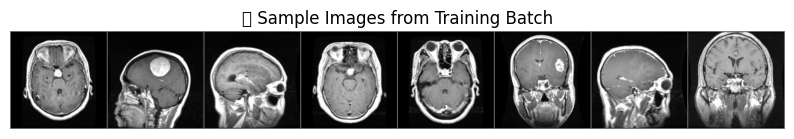

Labels:
pituitary | meningioma | glioma | pituitary | pituitary | glioma | glioma | pituitary

📊 Class Distribution in Train/Val/Test:

📊 Train Class Distribution:
  pituitary: 1053 samples
  notumor: 1152 samples
  glioma: 954 samples
  meningioma: 952 samples

📊 Validation Class Distribution:
  glioma: 102 samples
  pituitary: 112 samples
  notumor: 124 samples
  meningioma: 119 samples

📊 Test Class Distribution:
  glioma: 265 samples
  meningioma: 268 samples
  notumor: 319 samples
  pituitary: 292 samples

📦 Dataset Consistency Check:
Images in disk folders: 5712
Images in datasets (train+val+test): 5712

✅ All dataset diagnostics passed!

🧪 Validating individual images for loadability...
✅ All images are valid and loadable.


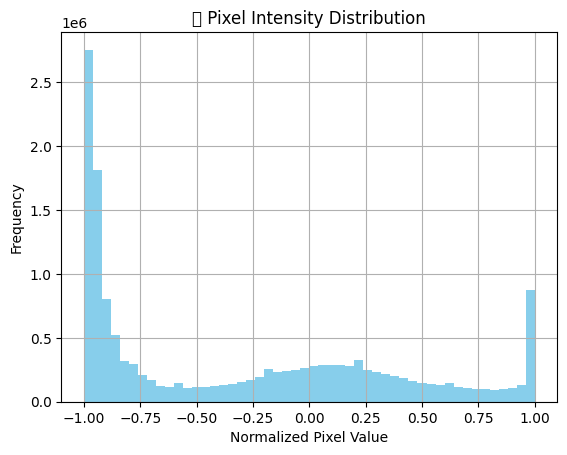


✅ All dataset diagnostics passed!

📏 Mean per channel: tensor([-0.3111, -0.3110, -0.3107])
📐 Std per channel: tensor([0.6624, 0.6624, 0.6624])
🖤 Grayscale-like images in sample: 98 / 100

✅ All dataset diagnostics passed!


In [4]:
# === Phase 2: Preprocessing & Data Loading ===

import os
import zipfile
import shutil
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import torchvision
import numpy as np
from collections import Counter

# Unzip and setup dataset folder


# Define correct paths directly
training_dir = "/drive/MyDrive/BFPI/train"
testing_dir = "/drive/MyDrive/BFPI/test"

# Define image transformations
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load datasets with correct structure
full_dataset_train = datasets.ImageFolder(root=training_dir, transform=image_transforms)
dataset_test = datasets.ImageFolder(root=testing_dir, transform=image_transforms)

# Split train dataset into train/val
train_size = int(0.9 * len(full_dataset_train))
val_size = len(full_dataset_train) - train_size
dataset_train, dataset_val = random_split(full_dataset_train, [train_size, val_size])

# Dataloaders
batch_size = 32
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

# === Diagnostic Block ===

# === 1. Dataset Size Check ===
print("\U0001F50D Dataset Sizes:")
print(f"Training set:   {len(train_loader.dataset)} samples")
print(f"Validation set: {len(val_loader.dataset)} samples")
print(f"Test set:       {len(test_loader.dataset)} samples")

# === 2. Batch Shape Check ===
sample_images, sample_labels = next(iter(train_loader))
print("\n\U0001F9EA Batch Check:")
print(f"Image batch shape: {sample_images.shape}")
print(f"Label batch shape: {sample_labels.shape}")

# === 3. Visual Inspection ===
classes = full_dataset_train.classes

def imshow(img_tensor):
    img_tensor = img_tensor / 2 + 0.5  # unnormalize
    npimg = img_tensor.numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title("\U0001F50D Sample Images from Training Batch")
    plt.show()

imshow(torchvision.utils.make_grid(sample_images[:8]))
print("Labels:")
print(' | '.join(classes[label] for label in sample_labels[:8]))

# === 4. Class Distribution Check ===
def count_class_distribution(dataset):
    counter = Counter()
    for _, label in dataset:
        counter[label] += 1
    return counter

print("\n\U0001F4CA Class Distribution in Train/Val/Test:")
print("\n📊 Train Class Distribution:")
for cls_idx, count in count_class_distribution(dataset_train).items():
    print(f"  {classes[cls_idx]}: {count} samples")

print("\n📊 Validation Class Distribution:")
for cls_idx, count in count_class_distribution(dataset_val).items():
    print(f"  {classes[cls_idx]}: {count} samples")

print("\n📊 Test Class Distribution:")
for cls_idx, count in count_class_distribution(dataset_test).items():
    print(f"  {classes[cls_idx]}: {count} samples")

# === 5. Consistency Check ===
def count_images_in_folder(folder):
    return sum([len(files) for r, d, files in os.walk(folder) if any(f.lower().endswith(('jpg', 'jpeg', 'png')) for f in files)])

expected_total_train = count_images_in_folder(training_dir)
expected_total_test = count_images_in_folder(testing_dir)
actual_total = len(train_loader.dataset) + len(val_loader.dataset) + len(test_loader.dataset)

print("\n📦 Dataset Consistency Check:")
print(f"Images in disk folders: {expected_total_train + expected_total_test}")
print(f"Images in datasets (train+val+test): {actual_total}")
assert expected_total_train + expected_total_test == actual_total, "❌ Mismatch in total image counts!"

print("\n✅ All dataset diagnostics passed!")

from PIL import Image

# === 6. Per-Image Loadability Check ===
def validate_images(root_dir):
    corrupted = []
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                img_path = os.path.join(subdir, file)
                try:
                    img = Image.open(img_path).convert("RGB")
                    img.verify()  # Check for integrity
                except Exception as e:
                    corrupted.append((img_path, str(e)))
    return corrupted

print("\n🧪 Validating individual images for loadability...")

corrupt_train = validate_images(training_dir)
corrupt_test = validate_images(testing_dir)

if corrupt_train or corrupt_test:
    print(f"\n❌ Found {len(corrupt_train)} corrupted images in Training set:")
    for path, err in corrupt_train[:5]:
        print(f" - {path}: {err}")

    print(f"\n❌ Found {len(corrupt_test)} corrupted images in Testing set:")
    for path, err in corrupt_test[:5]:
        print(f" - {path}: {err}")

    raise ValueError("Image validation failed — please inspect the corrupted files.")
else:
    print("✅ All images are valid and loadable.")

# === 7. Pixel Intensity Histogram ===
def plot_pixel_histogram(dataset, num_samples=100):
    pixels = []
    for i in range(min(num_samples, len(dataset))):
        img, _ = dataset[i]
        pixels.extend(img.flatten().numpy())
    plt.hist(pixels, bins=50, color='skyblue')
    plt.title("\U0001F5BC️ Pixel Intensity Distribution")
    plt.xlabel("Normalized Pixel Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_pixel_histogram(dataset_train)

print("\n✅ All dataset diagnostics passed!")

# === 8. Additional Diagnostics ===

def calculate_mean_std(dataset, num_samples=100):
    imgs = torch.stack([dataset[i][0] for i in range(min(num_samples, len(dataset)))])
    mean = imgs.mean(dim=[0, 2, 3])
    std = imgs.std(dim=[0, 2, 3])
    return mean, std

def detect_grayscale_images(dataset, num_samples=100):
    gray_count = 0
    for i in range(min(num_samples, len(dataset))):
        img, _ = dataset[i]
        if torch.allclose(img[0], img[1]) and torch.allclose(img[1], img[2]):
            gray_count += 1
    return gray_count

mean, std = calculate_mean_std(dataset_train)
print(f"\n📏 Mean per channel: {mean}")
print(f"📐 Std per channel: {std}")

gray_count = detect_grayscale_images(dataset_train)
print(f"🖤 Grayscale-like images in sample: {gray_count} / 100")

print("\n✅ All dataset diagnostics passed!")



In [5]:
# === Phase 3: Model Building & Training of SOH-ViT ===

import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from tqdm import tqdm

# === Patch Embedding Layer ===
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels, embed_dim, patch_size):
        super().__init__()
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.flatten = nn.Flatten(2)
        self.transpose = lambda x: x.transpose(1, 2)

    def forward(self, x):
        x = self.proj(x)
        x = self.flatten(x)
        x = self.transpose(x)
        return x

# === Transformer Encoder Layer ===
class TransformerEncoderLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4.0, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, int(embed_dim * mlp_ratio)),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(int(embed_dim * mlp_ratio), embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        x = x + self.attn(self.norm1(x), self.norm1(x), self.norm1(x))[0]
        x = x + self.mlp(self.norm2(x))
        return x

# === Self-Optimizing Hybrid Vision Transformer ===
class SOHViT(nn.Module):
    def __init__(self, num_classes=4, cnn_out_dim=512, embed_dim=256, patch_size=2, depth=4, num_heads=8):
        super().__init__()
        cnn = models.resnet18(pretrained=True)
        self.cnn_backbone = nn.Sequential(*list(cnn.children())[:-2])
        self.patch_embed = PatchEmbedding(in_channels=cnn_out_dim, embed_dim=embed_dim, patch_size=patch_size)
        self.pos_embed = nn.Parameter(torch.randn(1, 49, embed_dim))
        self.transformer = nn.Sequential(
            *[TransformerEncoderLayer(embed_dim, num_heads) for _ in range(depth)]
        )
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.cnn_backbone(x)
        x = self.patch_embed(x)
        x = x + self.pos_embed[:, :x.size(1), :]
        x = self.transformer(x)
        x = x.mean(dim=1)
        x = self.norm(x)
        x = self.head(x)
        return x

# === Training Utilities ===
def compute_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0)
    }

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss, all_preds, all_labels = 0, [], []
    for images, labels in tqdm(loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        preds = outputs.argmax(dim=1).detach().cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
    metrics = compute_metrics(all_labels, all_preds)
    return total_loss / len(loader), metrics

def validate_epoch(model, loader, criterion, device):
    model.eval()
    total_loss, all_preds, all_labels = 0, [], []
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validation", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    metrics = compute_metrics(all_labels, all_preds)
    return total_loss / len(loader), metrics

def test_model(model, loader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Testing", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    metrics = compute_metrics(all_labels, all_preds)
    return metrics

# === Training Run ===
def train_sohvit(train_loader, val_loader, test_loader, num_epochs=15):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = SOHViT().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

    for epoch in range(num_epochs):
        print(f"\n🌟 Epoch {epoch+1}/{num_epochs}")
        train_loss, train_metrics = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_metrics = validate_epoch(model, val_loader, criterion, device)
        scheduler.step()
        print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_metrics['accuracy']:.4f}")
        print(f"Val   Loss: {val_loss:.4f}, Accuracy: {val_metrics['accuracy']:.4f}")

    print("\n📊 Evaluating on Test Set...")
    test_metrics = test_model(model, test_loader, device)
    print(f"Test Accuracy: {test_metrics['accuracy']:.4f}")
    print(f"Precision: {test_metrics['precision']:.4f}, Recall: {test_metrics['recall']:.4f}")

    return model

# === Launch Training ===
model = train_sohvit(train_loader, val_loader, test_loader, num_epochs=15)
torch.save(model.state_dict(), "/drive/MyDrive/soh_vit_model.pth")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]



🌟 Epoch 1/15


Train Loss: 0.2798, Accuracy: 0.9025
Val   Loss: 0.1591, Accuracy: 0.9431

🌟 Epoch 2/15


Train Loss: 0.0619, Accuracy: 0.9788
Val   Loss: 0.1484, Accuracy: 0.9519

🌟 Epoch 3/15


Train Loss: 0.0346, Accuracy: 0.9881
Val   Loss: 0.1990, Accuracy: 0.9519

🌟 Epoch 4/15


Train Loss: 0.0390, Accuracy: 0.9866
Val   Loss: 0.1472, Accuracy: 0.9562

🌟 Epoch 5/15


Train Loss: 0.0103, Accuracy: 0.9956
Val   Loss: 0.1260, Accuracy: 0.9781

🌟 Epoch 6/15


Train Loss: 0.0038, Accuracy: 0.9985
Val   Loss: 0.1156, Accuracy: 0.9759

🌟 Epoch 7/15


Train Loss: 0.0045, Accuracy: 0.9988
Val   Loss: 0.0993, Accuracy: 0.9781

🌟 Epoch 8/15


Train Loss: 0.0019, Accuracy: 0.9995
Val   Loss: 0.0725, Accuracy: 0.9759

🌟 Epoch 9/15


Train Loss: 0.0012, Accuracy: 1.0000
Val   Loss: 0.0845, Accuracy: 0.9781

🌟 Epoch 10/15


Train Loss: 0.0009, Accuracy: 1.0000
Val   Loss: 0.0810, Accuracy: 0.9781

🌟 Epoch 11/15


Train Loss: 0.0006, Accuracy: 1.0000
Val   Loss: 0.0861, Accuracy: 0.9781

🌟 Epoch 12/15


Train Loss: 0.0011, Accuracy: 1.0000
Val   Loss: 0.0813, Accuracy: 0.9803

🌟 Epoch 13/15


Train Loss: 0.0011, Accuracy: 1.0000
Val   Loss: 0.0864, Accuracy: 0.9781

🌟 Epoch 14/15


Train Loss: 0.0036, Accuracy: 0.9985
Val   Loss: 0.0855, Accuracy: 0.9759

🌟 Epoch 15/15


Train Loss: 0.0007, Accuracy: 1.0000
Val   Loss: 0.0671, Accuracy: 0.9825

📊 Evaluating on Test Set...


Test Accuracy: 0.9764
Precision: 0.9767, Recall: 0.9764


In [6]:
def test_model(model, loader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Testing", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    metrics = compute_metrics(all_labels, all_preds)
    return metrics, all_preds, all_labels


In [7]:
# Rerun the test phase
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

metrics, y_pred, y_true = test_model(model, test_loader, device)






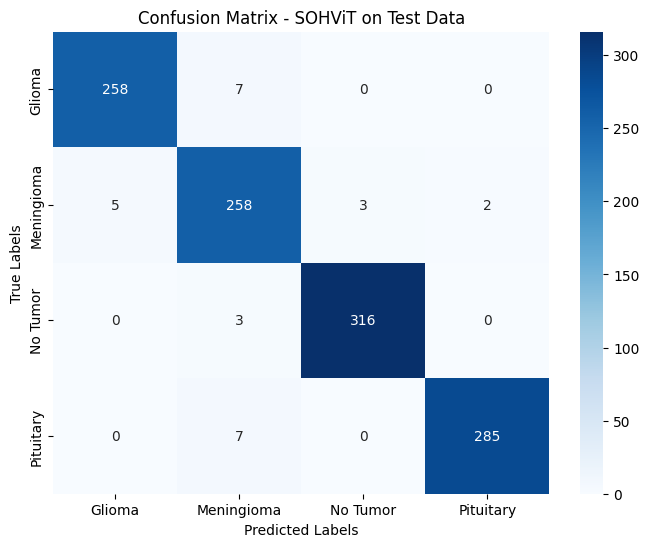

In [8]:
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Glioma", "Meningioma", "No Tumor", "Pituitary"],
            yticklabels=["Glioma", "Meningioma", "No Tumor", "Pituitary"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SOHViT on Test Data")
plt.show()

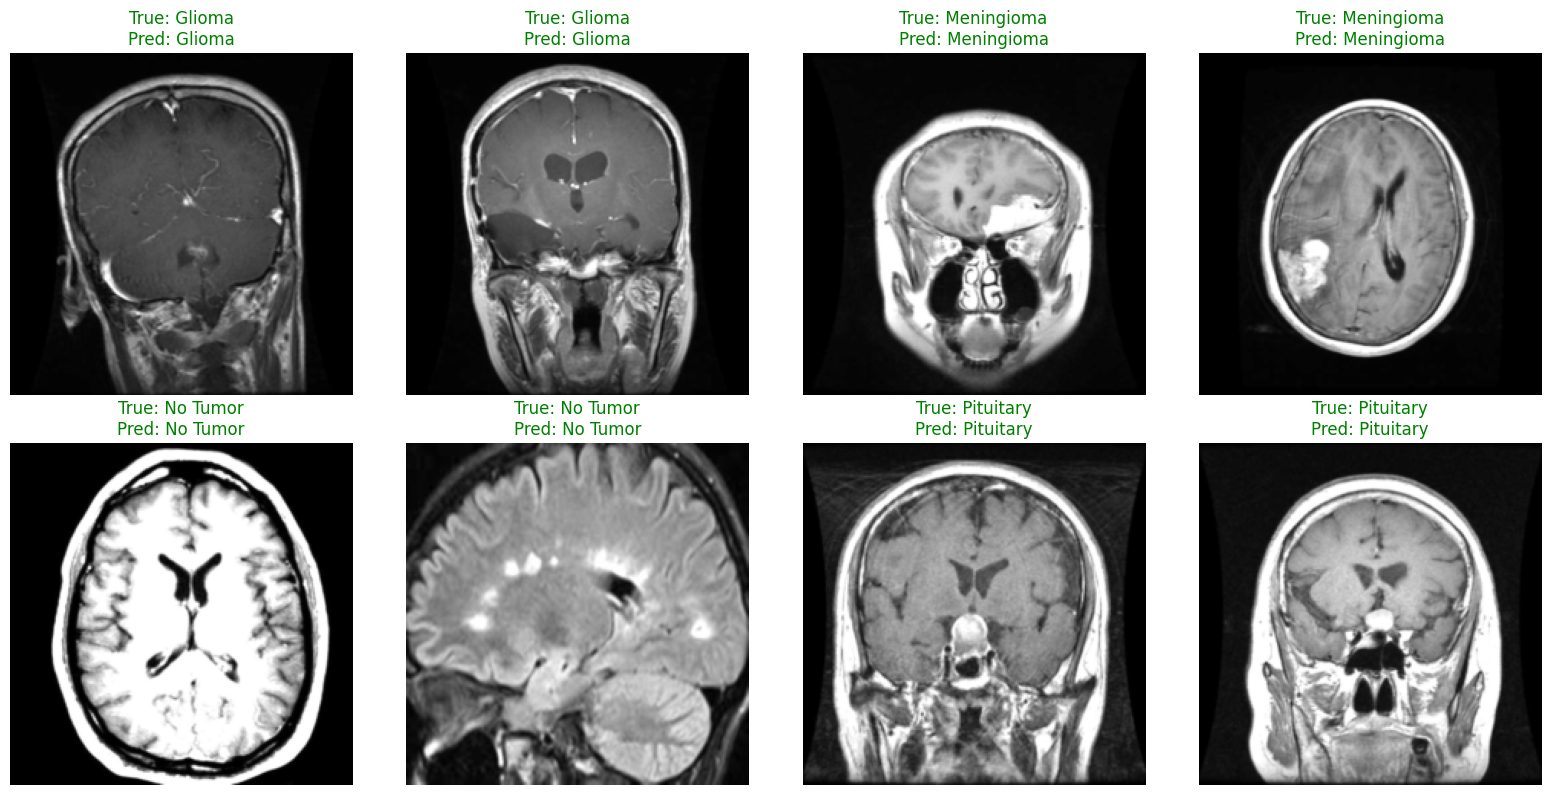

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Class names
class_names = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Dictionary to store up to 2 samples per class
samples_per_class = {i: [] for i in range(4)}  # 4 classes

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)

        for img, true_label, pred_label in zip(images, labels, preds):
            if len(samples_per_class[true_label.item()]) < 2:
                samples_per_class[true_label.item()].append((img.cpu(), true_label.item(), pred_label.item()))

        # Stop if we have enough samples
        if all(len(v) >= 2 for v in samples_per_class.values()):
            break

# Flatten the samples into a list
all_samples = []
for class_id in samples_per_class:
    all_samples.extend(samples_per_class[class_id])

# Plot the 8 samples
plt.figure(figsize=(16, 8))
for i, (img, true_label, pred_label) in enumerate(all_samples):
    img = img.permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())  # Normalize for display

    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}",
              color='green' if true_label == pred_label else 'red')

plt.tight_layout()
plt.show()


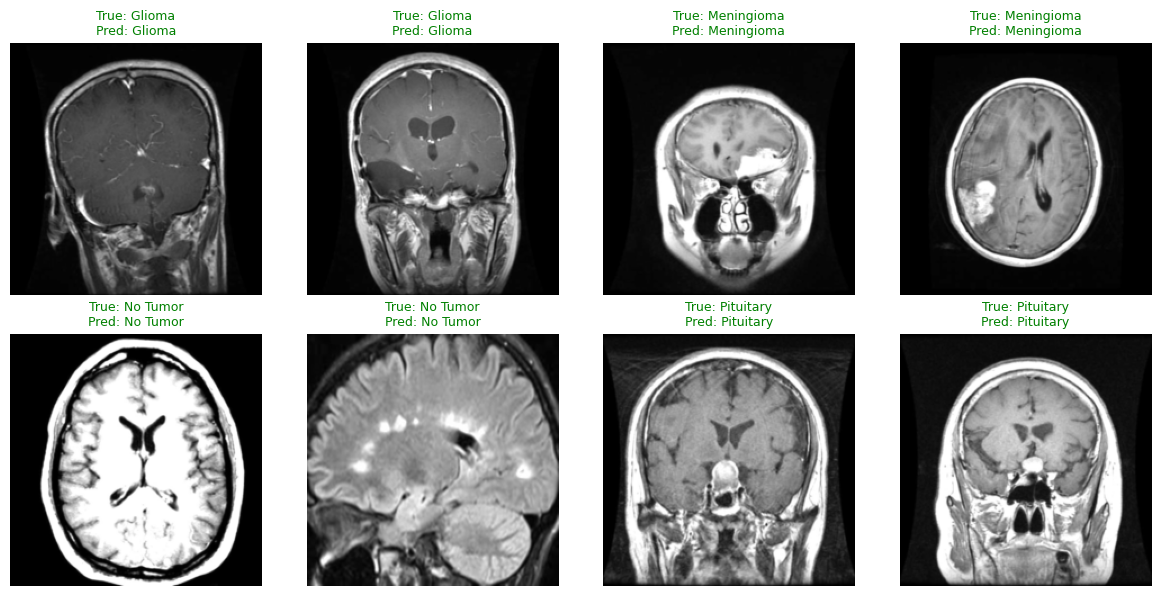

In [10]:
plt.figure(figsize=(12, 6))  # Smaller overall figure

for i, (img, true_label, pred_label) in enumerate(all_samples):
    img = img.permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())  # Normalize for display

    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}",
              fontsize=9,
              color='green' if true_label == pred_label else 'red')

plt.tight_layout(pad=1.0)  # Add slight padding between plots
plt.show()
